In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_7kjcl05 because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
m0_scale    = 14
m0_min      = 2.4
m0_max      = 16
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# U to 2tau validation sample

In [16]:
bin_width=0.4

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch9_val_pseudoscalar_mae2.0971_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch11_val_pseudoscalar_mae2.0274_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch30_val_pseudoscalar_mae1.9682_inference_data.pkl


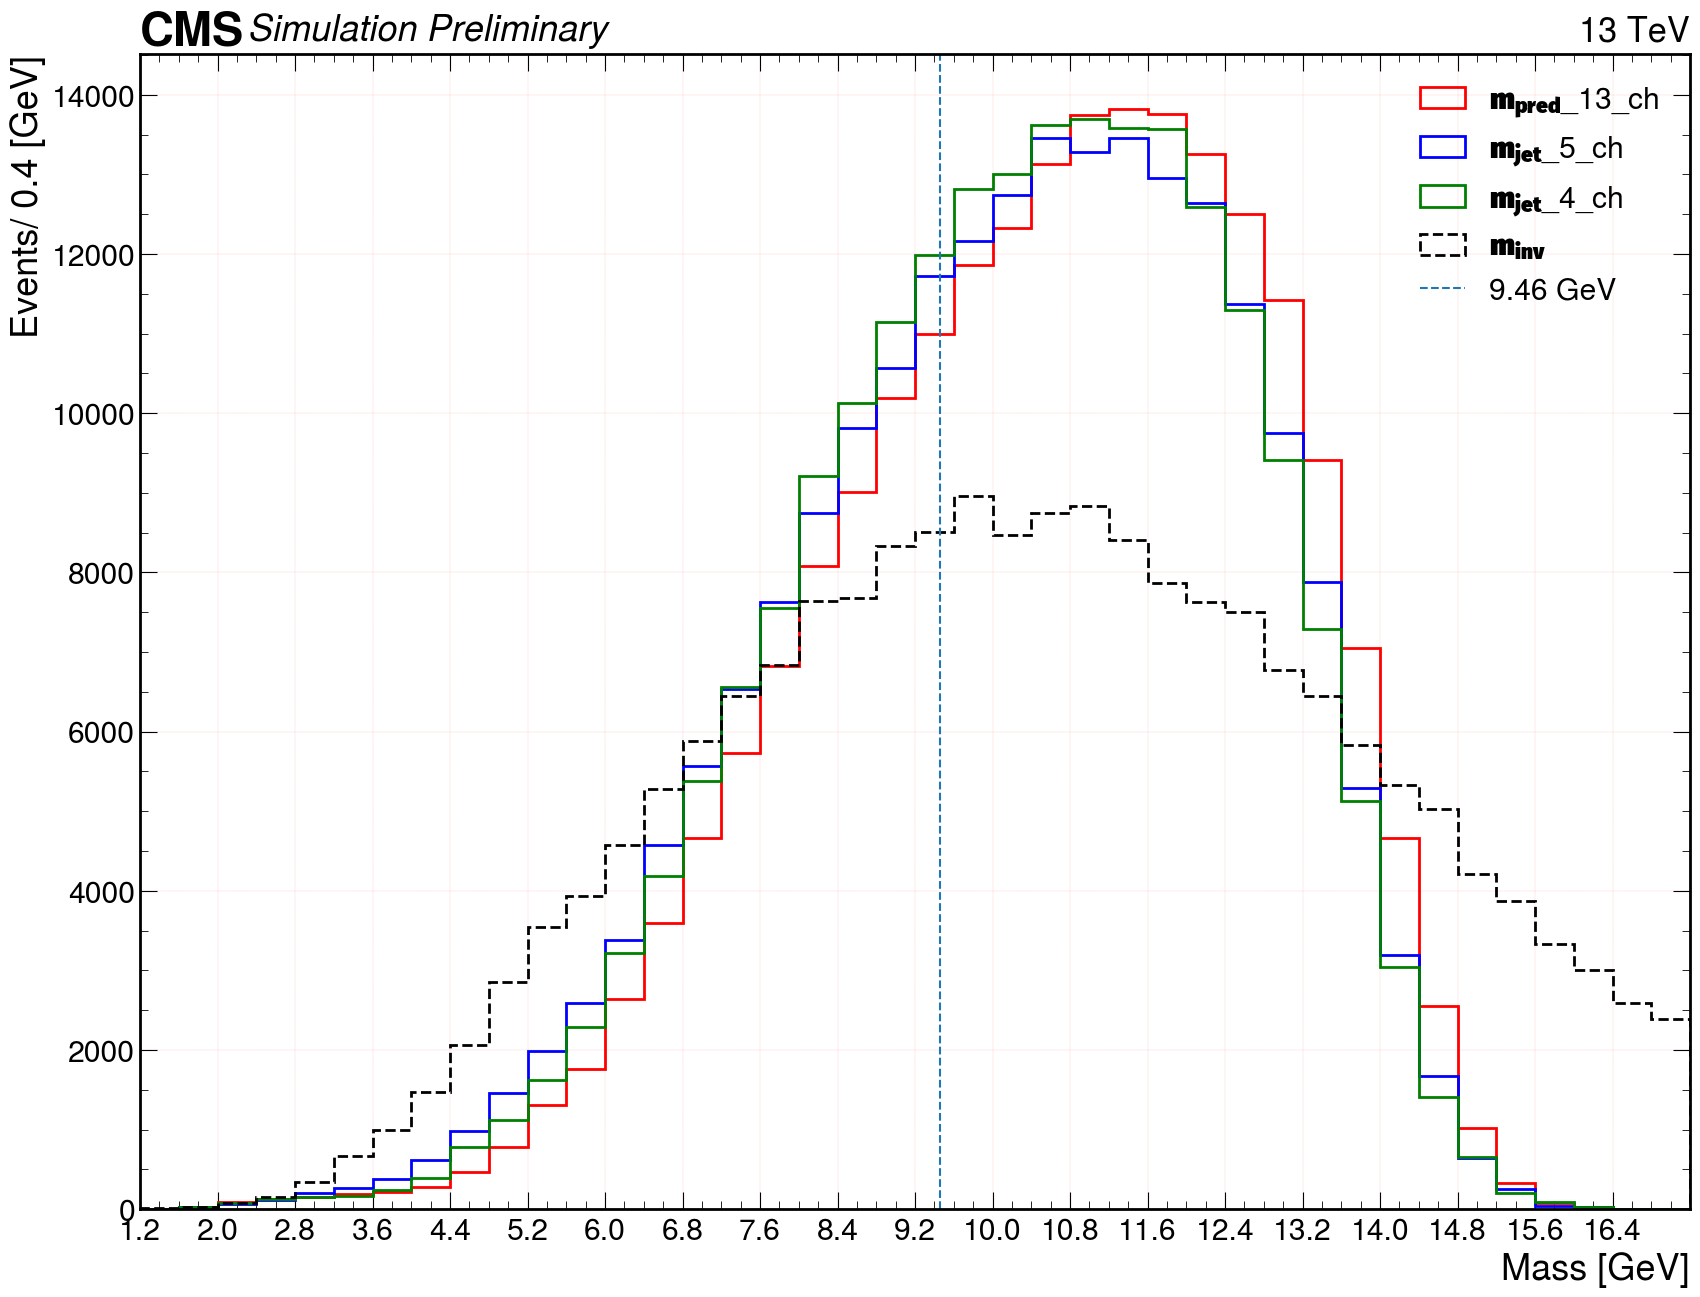

In [17]:
data_file1 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/*U*/*")[0]
infile1 = open(f"{data_file1}", "rb")
data1 = pickle.load(infile1)
print(f"loaded data file 1 ------>  {data_file1}")
infile1.close()
m_true_u1 = data1["m_true"]
m_pred_u1 = data1["m_pred"]
jet_massu1 = data1["m0"]

data_file2 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/*U*/*")[0]
infile2 = open(f"{data_file2}", "rb")
data2 = pickle.load(infile2)
print(f"loaded data file 2 ------>  {data_file2}")
infile2.close()
m_pred_u2 = data2["m_pred"]

data_file3 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*U*/*")[0]
infile3 = open(f"{data_file3}", "rb")
data3 = pickle.load(infile3)
print(f"loaded data file 3 ------>  {data_file3}")
infile2.close()
m_pred_u3 = data3["m_pred"]

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(20,15))
plt.hist(m_pred_u1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%'13_ch', linestyle='-', color='red', linewidth=2)

plt.hist(m_pred_u2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'5_ch', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_u3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'4_ch', linestyle='-', color='green', linewidth=2)
plt.hist(jet_massu1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{inv}}$', linestyle='--', color='black', linewidth=2)

plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [18]:
def plot_3_model_for_massreg(mass='3p7'):   
    data_file1 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    mass_ = {'3p7': 3.7, '4': 4, '5': 5,'6':6, '8':8, '10':10, '12':12, '14':14}.get(mass, None)
    infile1 = open(f"{data_file1}", "rb")
    data1 = pickle.load(infile1)
    print(f"loaded data file 1 ------>  {data_file1}")
    infile1.close()
    m_true_u1 = data1["m_true"]
    m_pred_u1 = data1["m_pred"]
    jet_massu1 = data1["m0"]

    data_file2 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    infile2 = open(f"{data_file2}", "rb")
    data2 = pickle.load(infile2)
    print(f"loaded data file 2 ------>  {data_file2}")
    infile2.close()
    m_pred_u2 = data2["m_pred"]
    
    data_file3 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    infile3 = open(f"{data_file3}", "rb")
    data3 = pickle.load(infile3)
    print(f"loaded data file 3 ------>  {data_file3}")
    infile3.close()
    m_pred_u3 = data3["m_pred"]


    # Check 1D m_pred
    # Extebded version
    fig, ax = plt.subplots(figsize=(20,15))
    plt.hist(m_pred_u1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%'13_ch', linestyle='-', color='red', linewidth=2)

    plt.hist(m_pred_u2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'5_ch', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_u3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'4_ch', linestyle='-', color='green', linewidth=2)
    plt.hist(jet_massu1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{inv}}$', linestyle='--', color='black', linewidth=2)

    plt.axvline(x= mass_,linestyle='--',label=f'{mass_} GeV')
    plt.xlim(m0_min-1.2,m0_max+1.2)
    plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8))
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()





# Signal Mass = 3.7 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.6245_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.6434_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.8918_inference_data.pkl


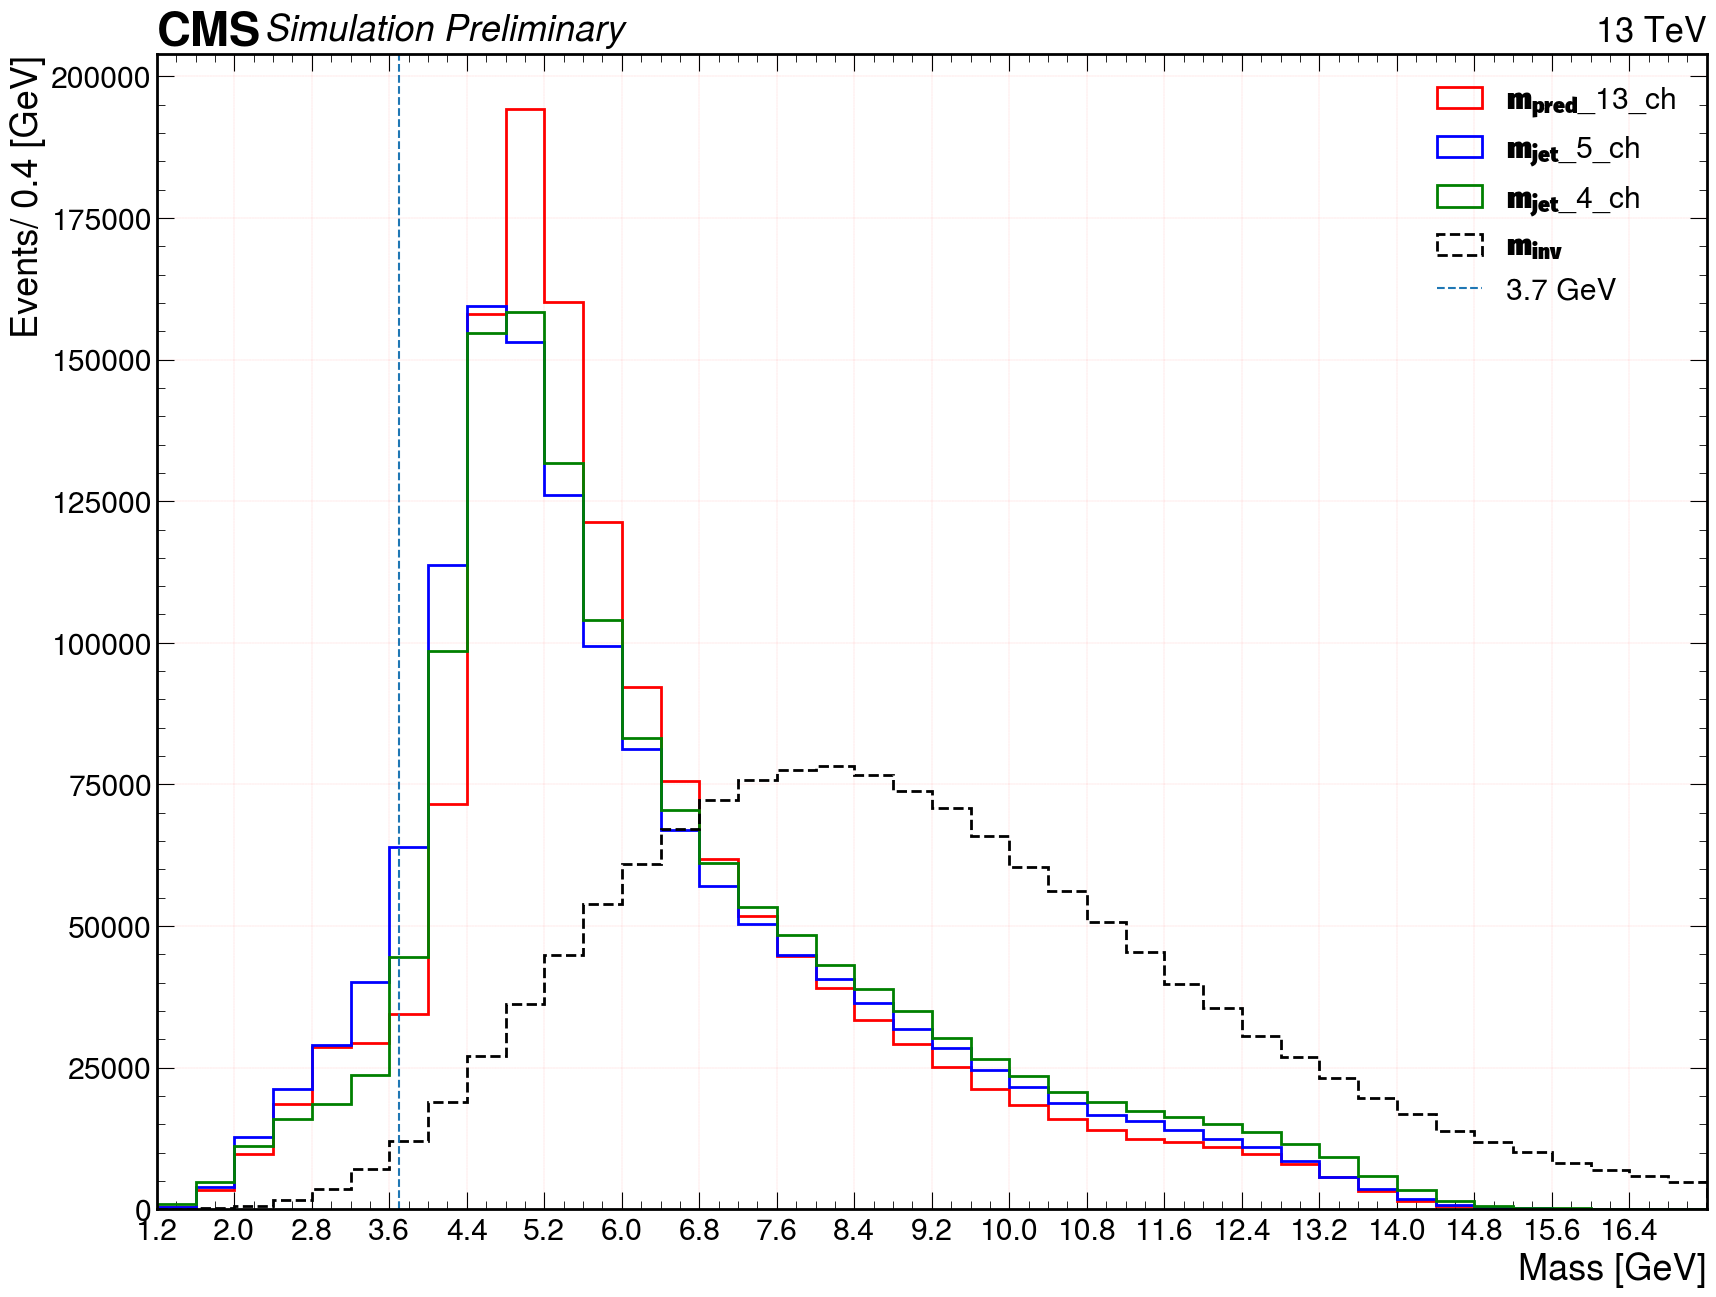

In [19]:
plot_3_model_for_massreg(mass='3p7')

# Sigmal Mass=4 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.4009_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.4762_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.6736_inference_data.pkl


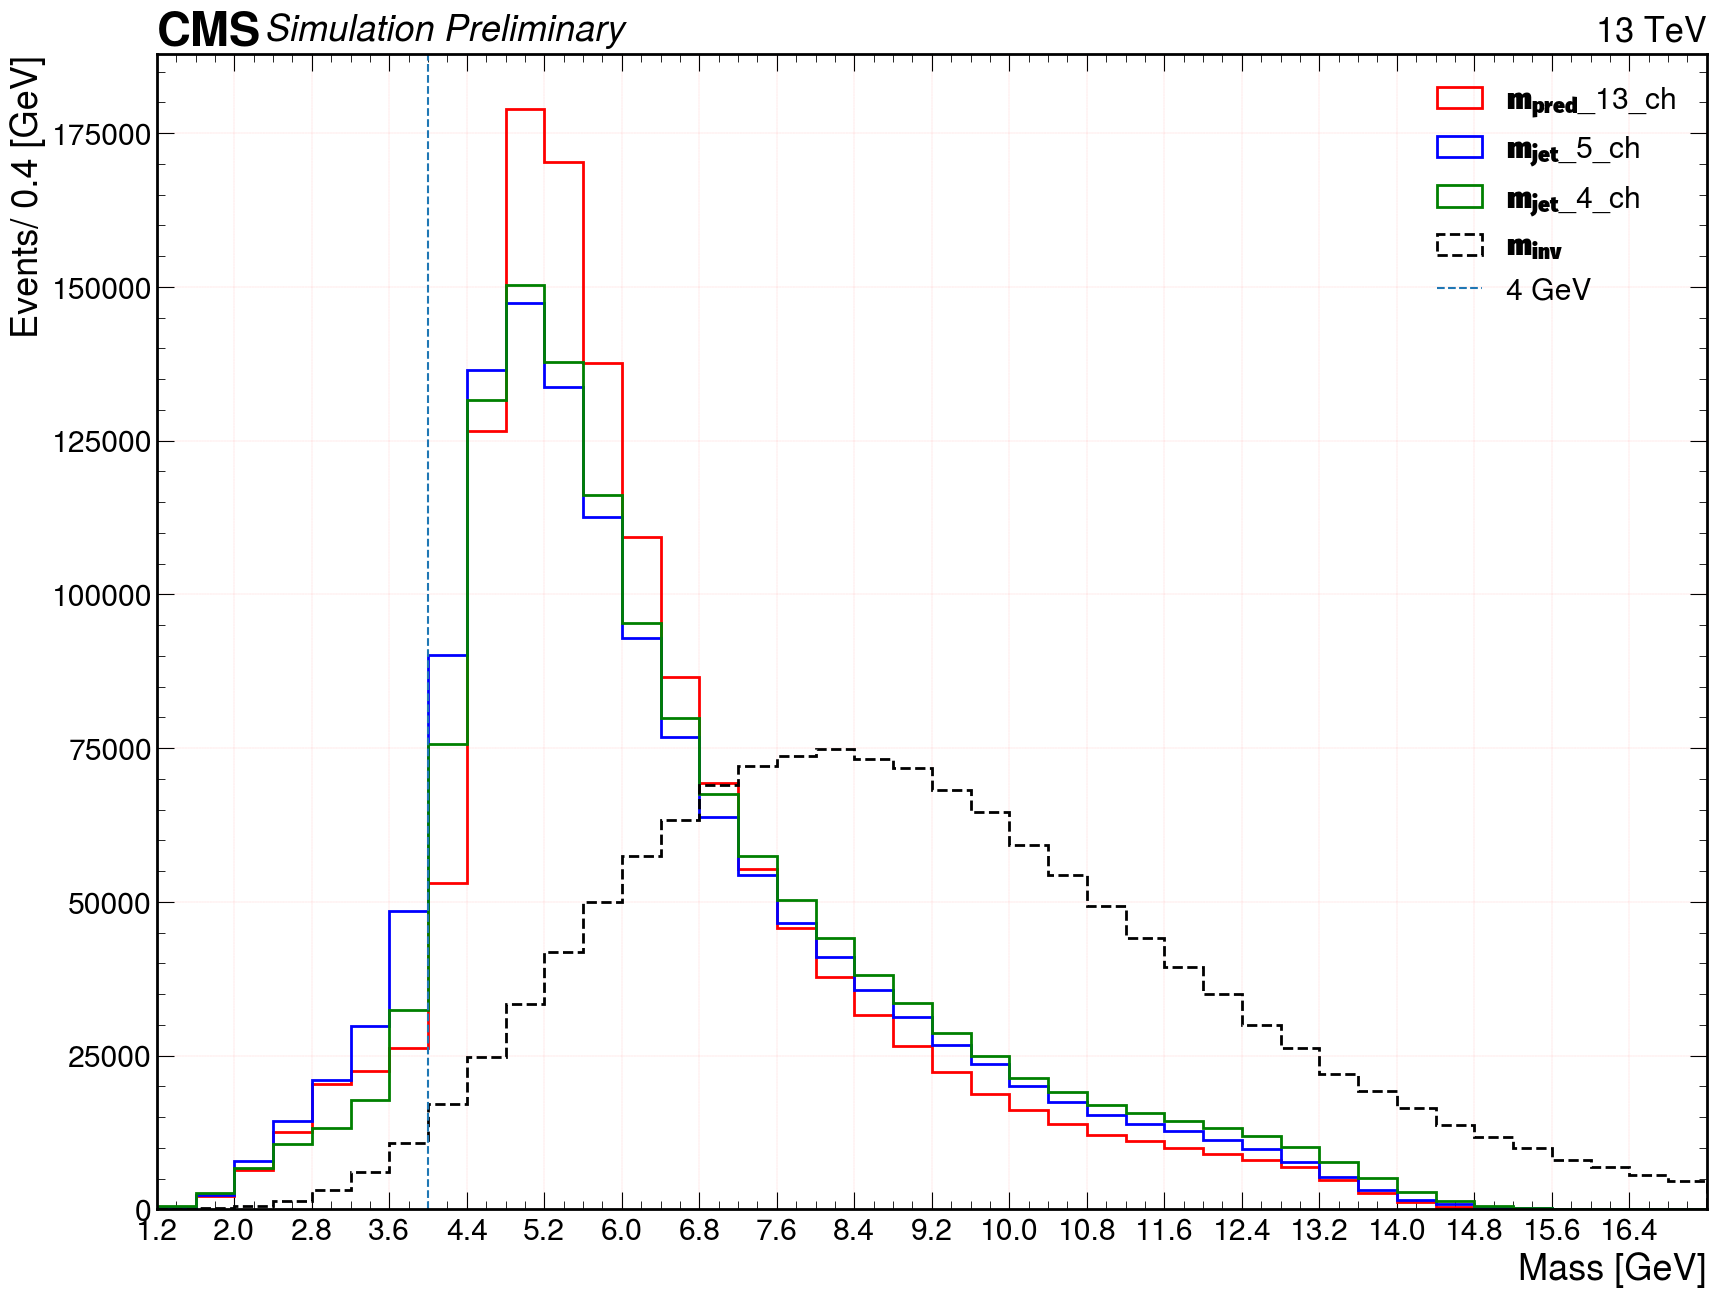

In [20]:
plot_3_model_for_massreg(mass='4')

# Signal Mass= 5 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9787_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1577_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.2686_inference_data.pkl


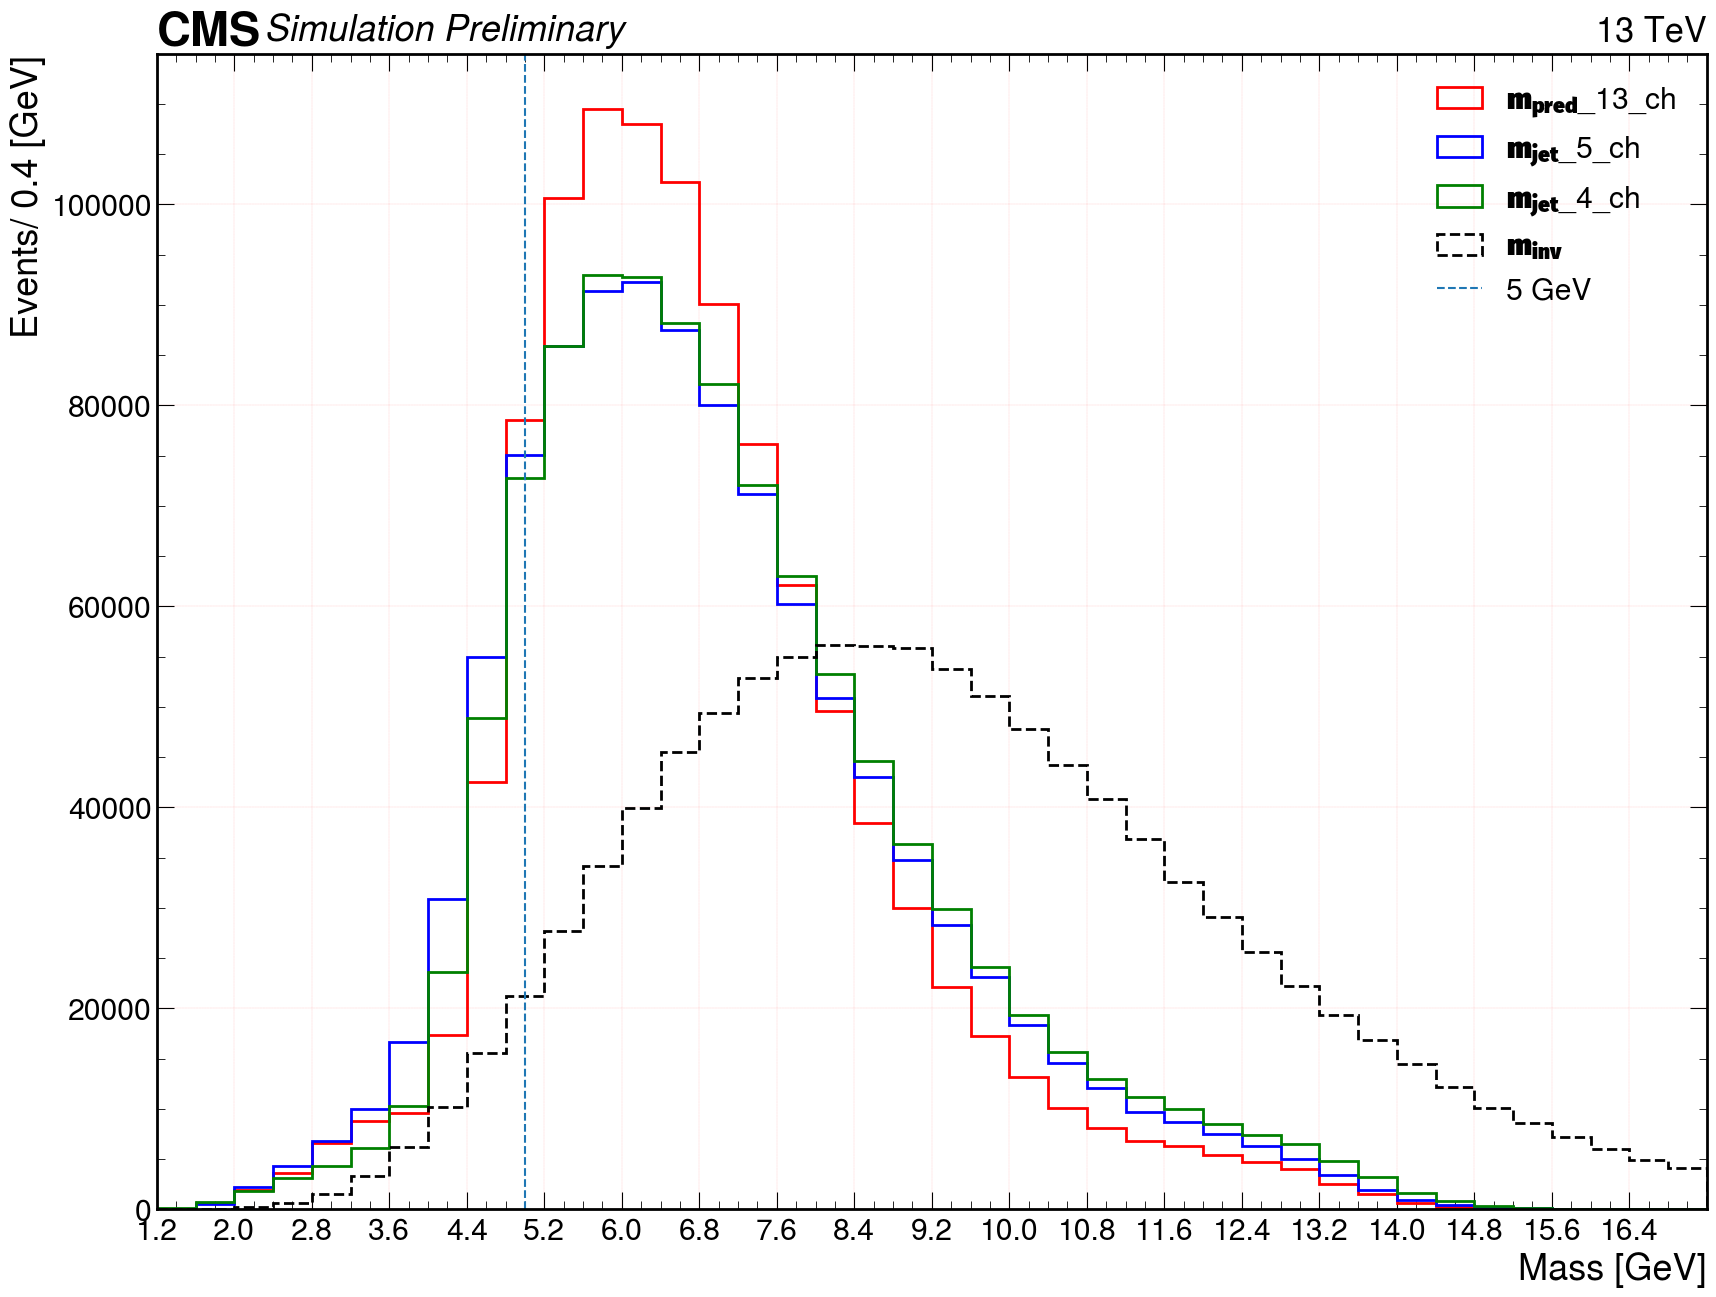

In [21]:
plot_3_model_for_massreg(mass='5')

# Signal Mass = 6 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.1520_inference_data.pkl


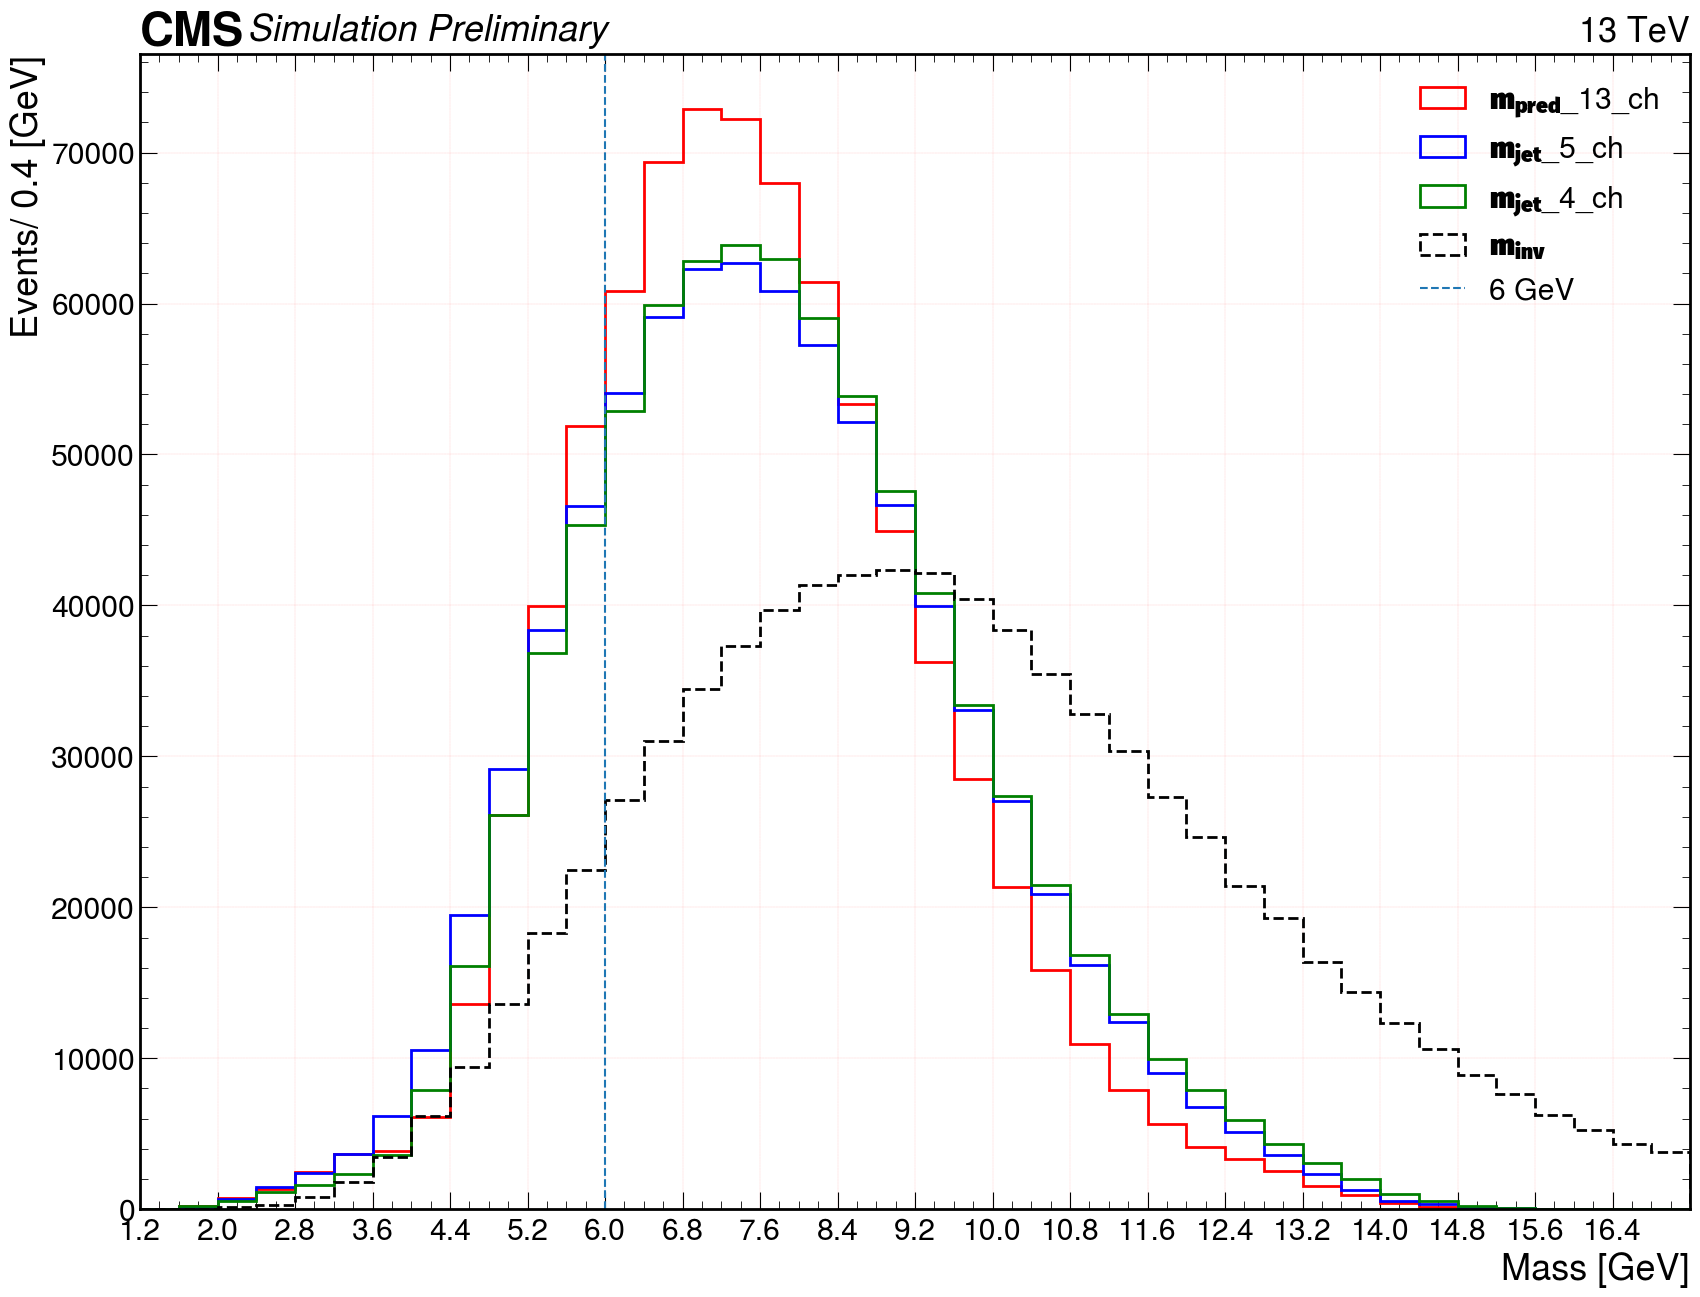

In [22]:
plot_3_model_for_massreg(mass='6')

# Signal Mass = * GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9087_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1182_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.1099_inference_data.pkl


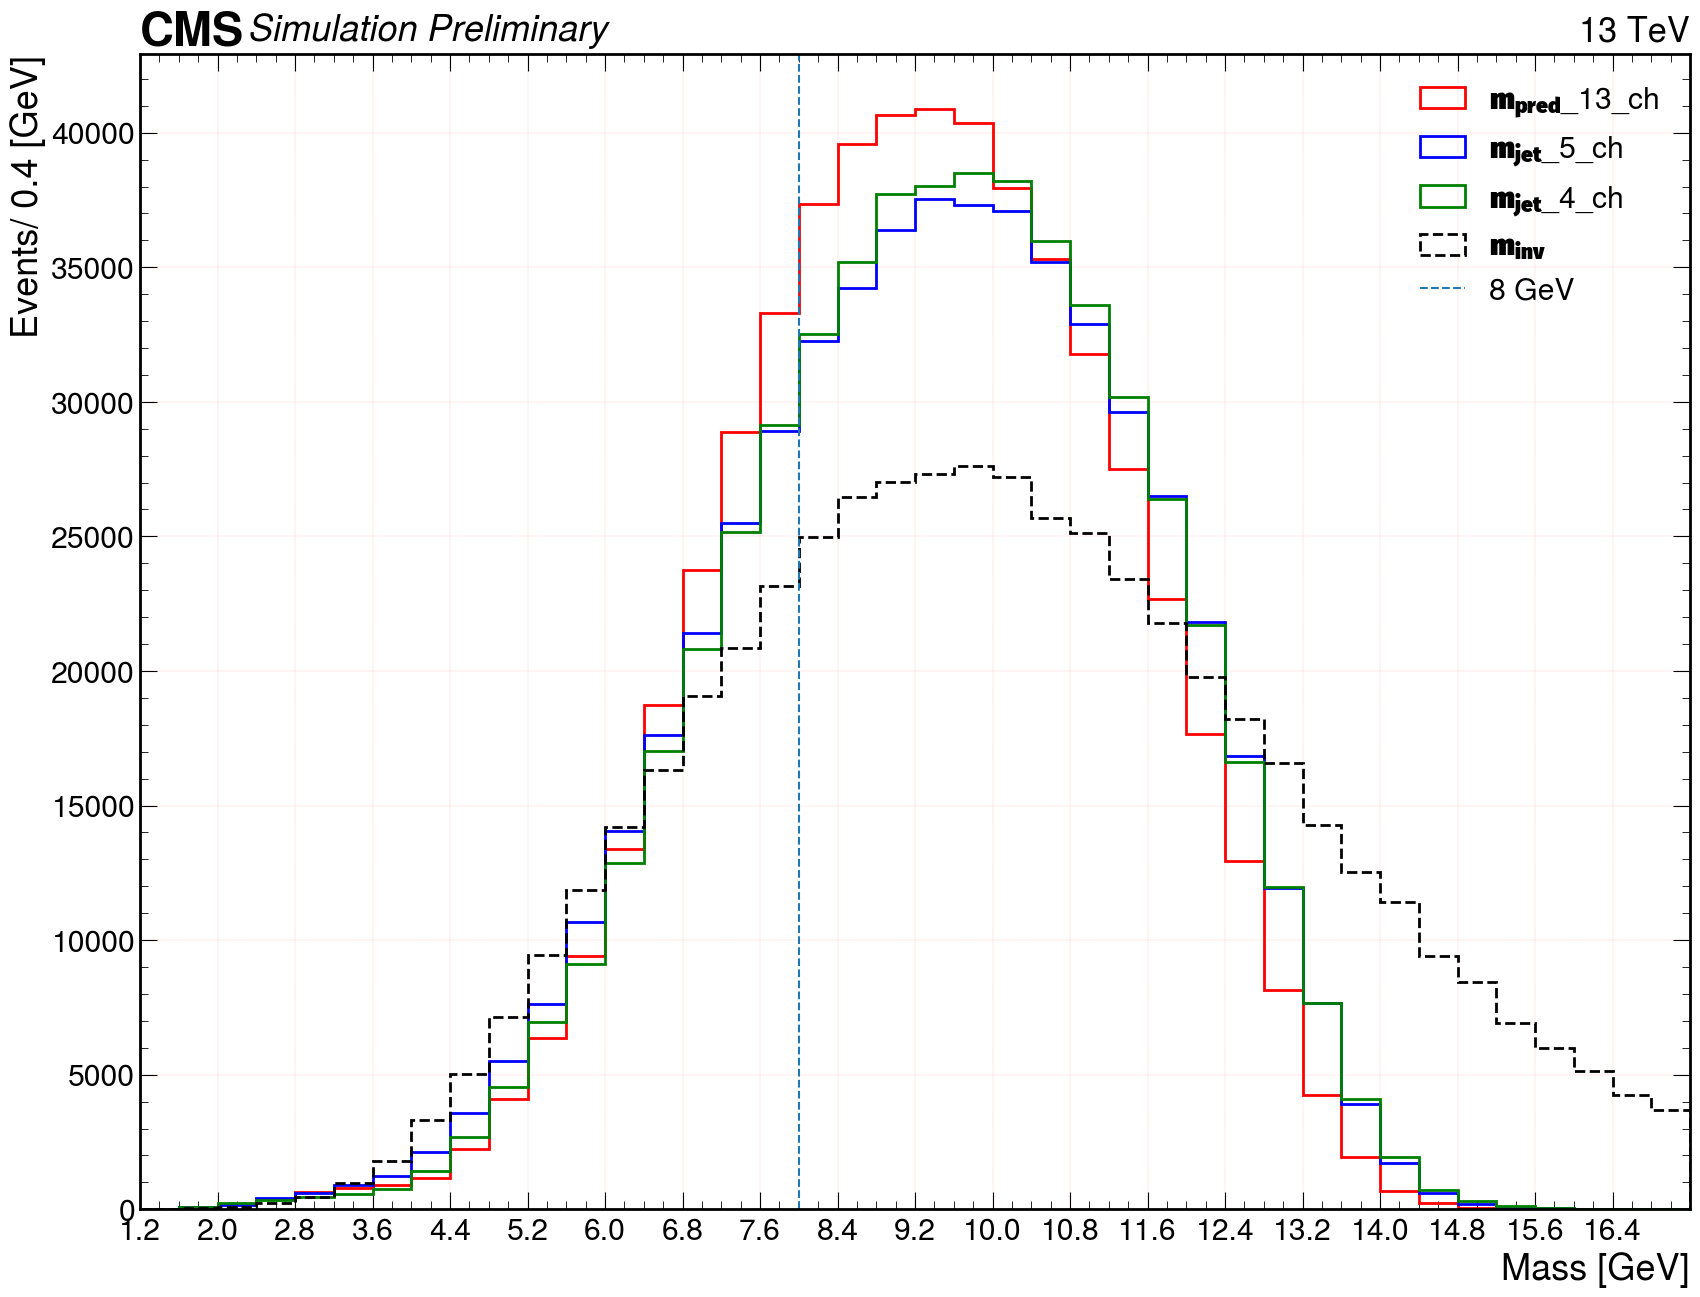

In [23]:
plot_3_model_for_massreg(mass='8')

# Signal Mass= 10 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch9_val_pseudoscalar_mae2.1142_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.9849_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9324_inference_data.pkl


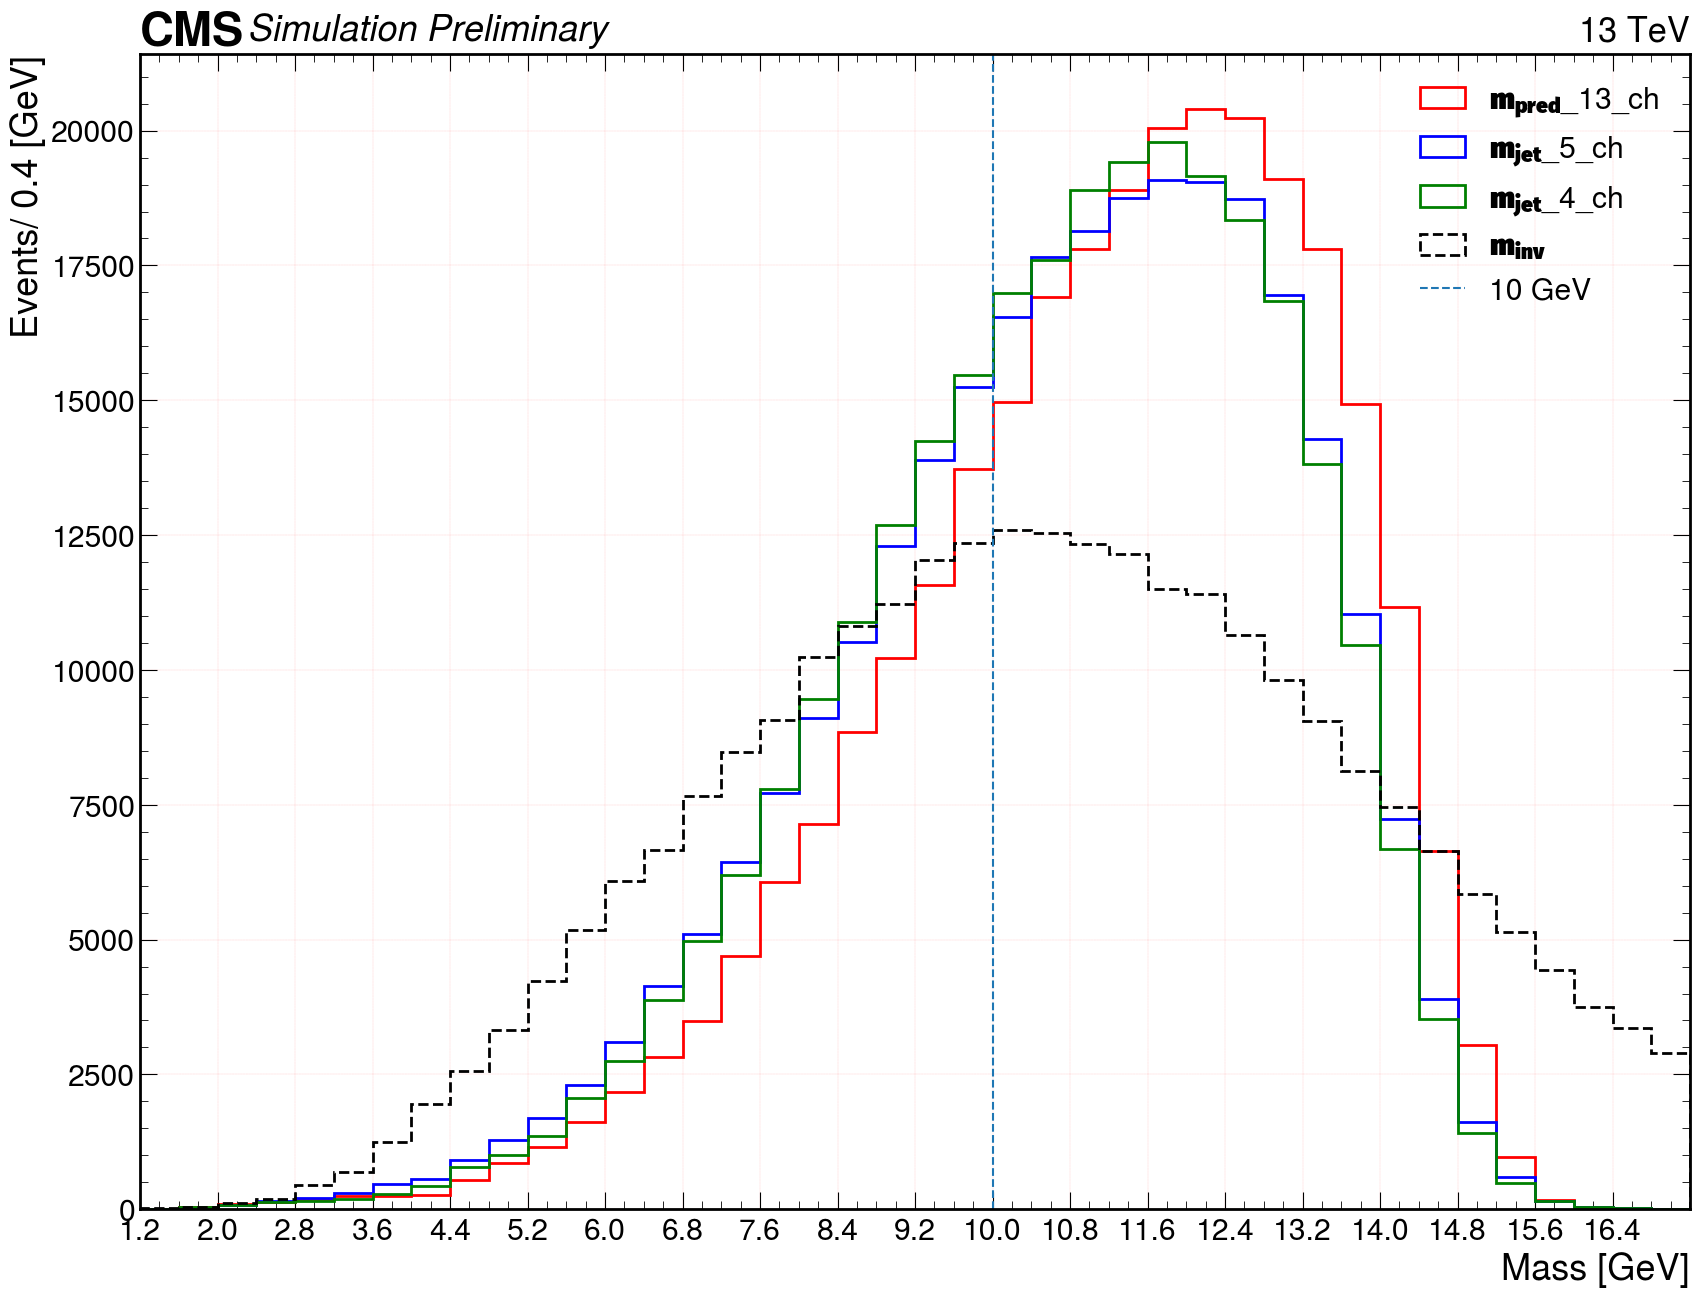

In [24]:
plot_3_model_for_massreg(mass='10')

# Signal Mass = 12 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.6734_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8464_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7940_inference_data.pkl


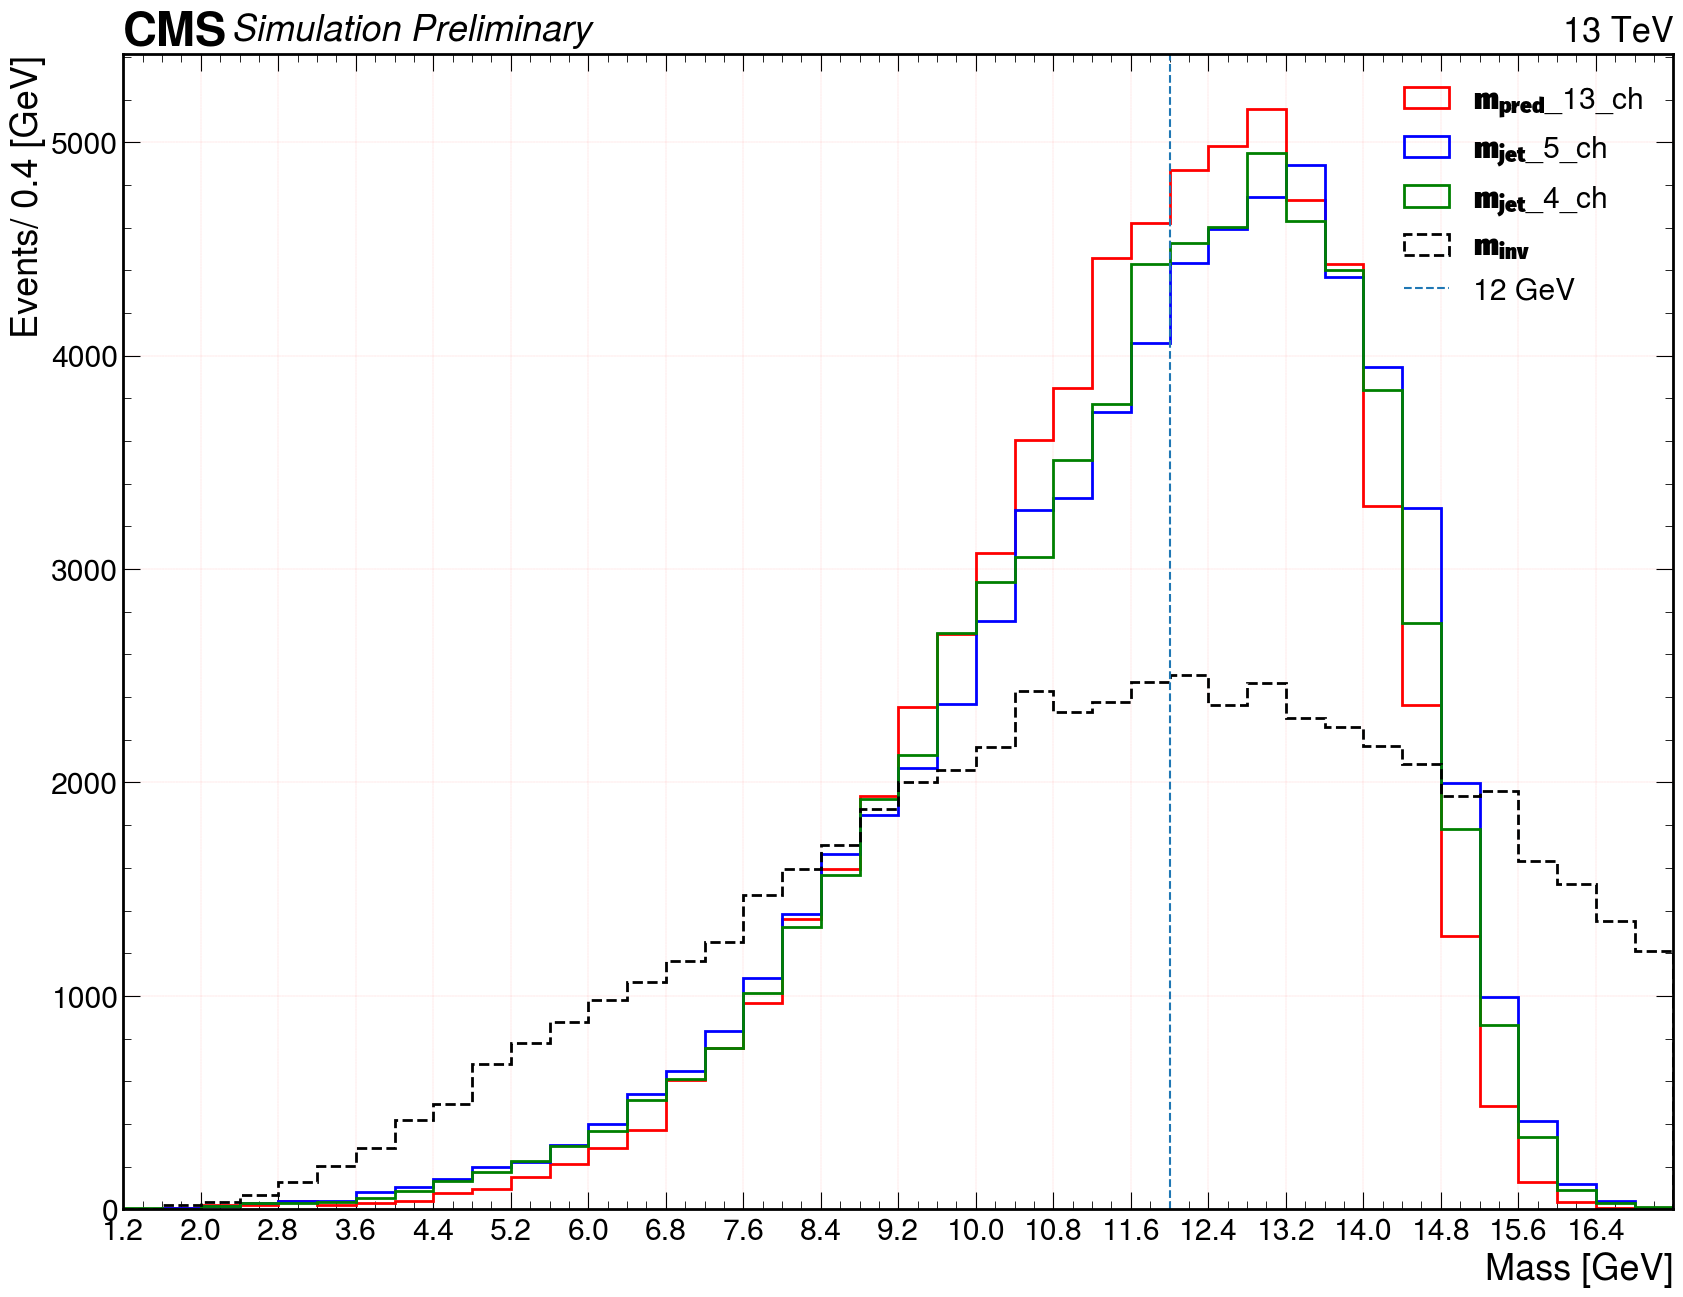

In [25]:
plot_3_model_for_massreg(mass='12')

# Signal Mass = 14 GeV

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.7857_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8898_inference_data.pkl
loaded data file 3 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9769_inference_data.pkl


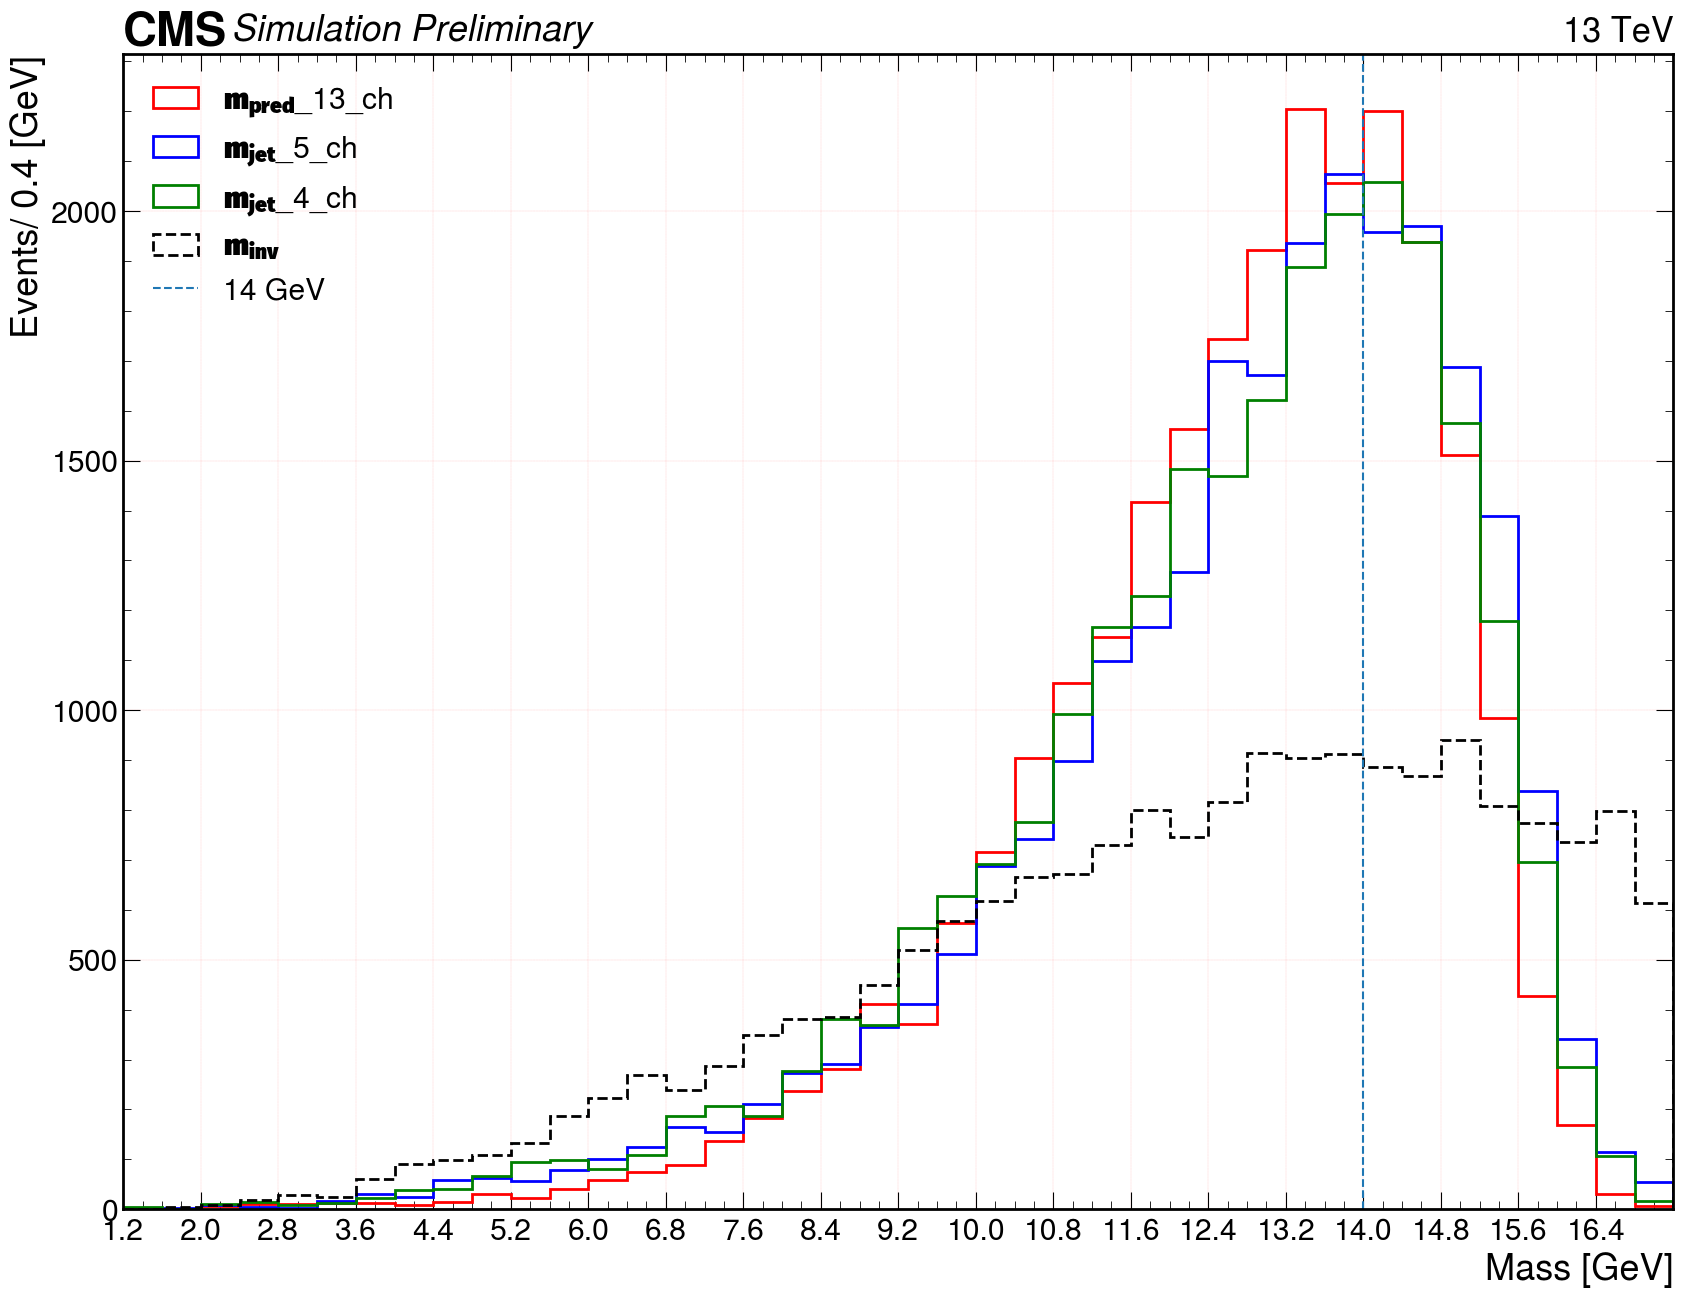

In [26]:
plot_3_model_for_massreg(mass='14')

# ----4c--4resnet-block---

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_reblock4/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch28_val_pseudoscalar_mae1.9817_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch30_val_pseudoscalar_mae1.9682_inference_data.pkl


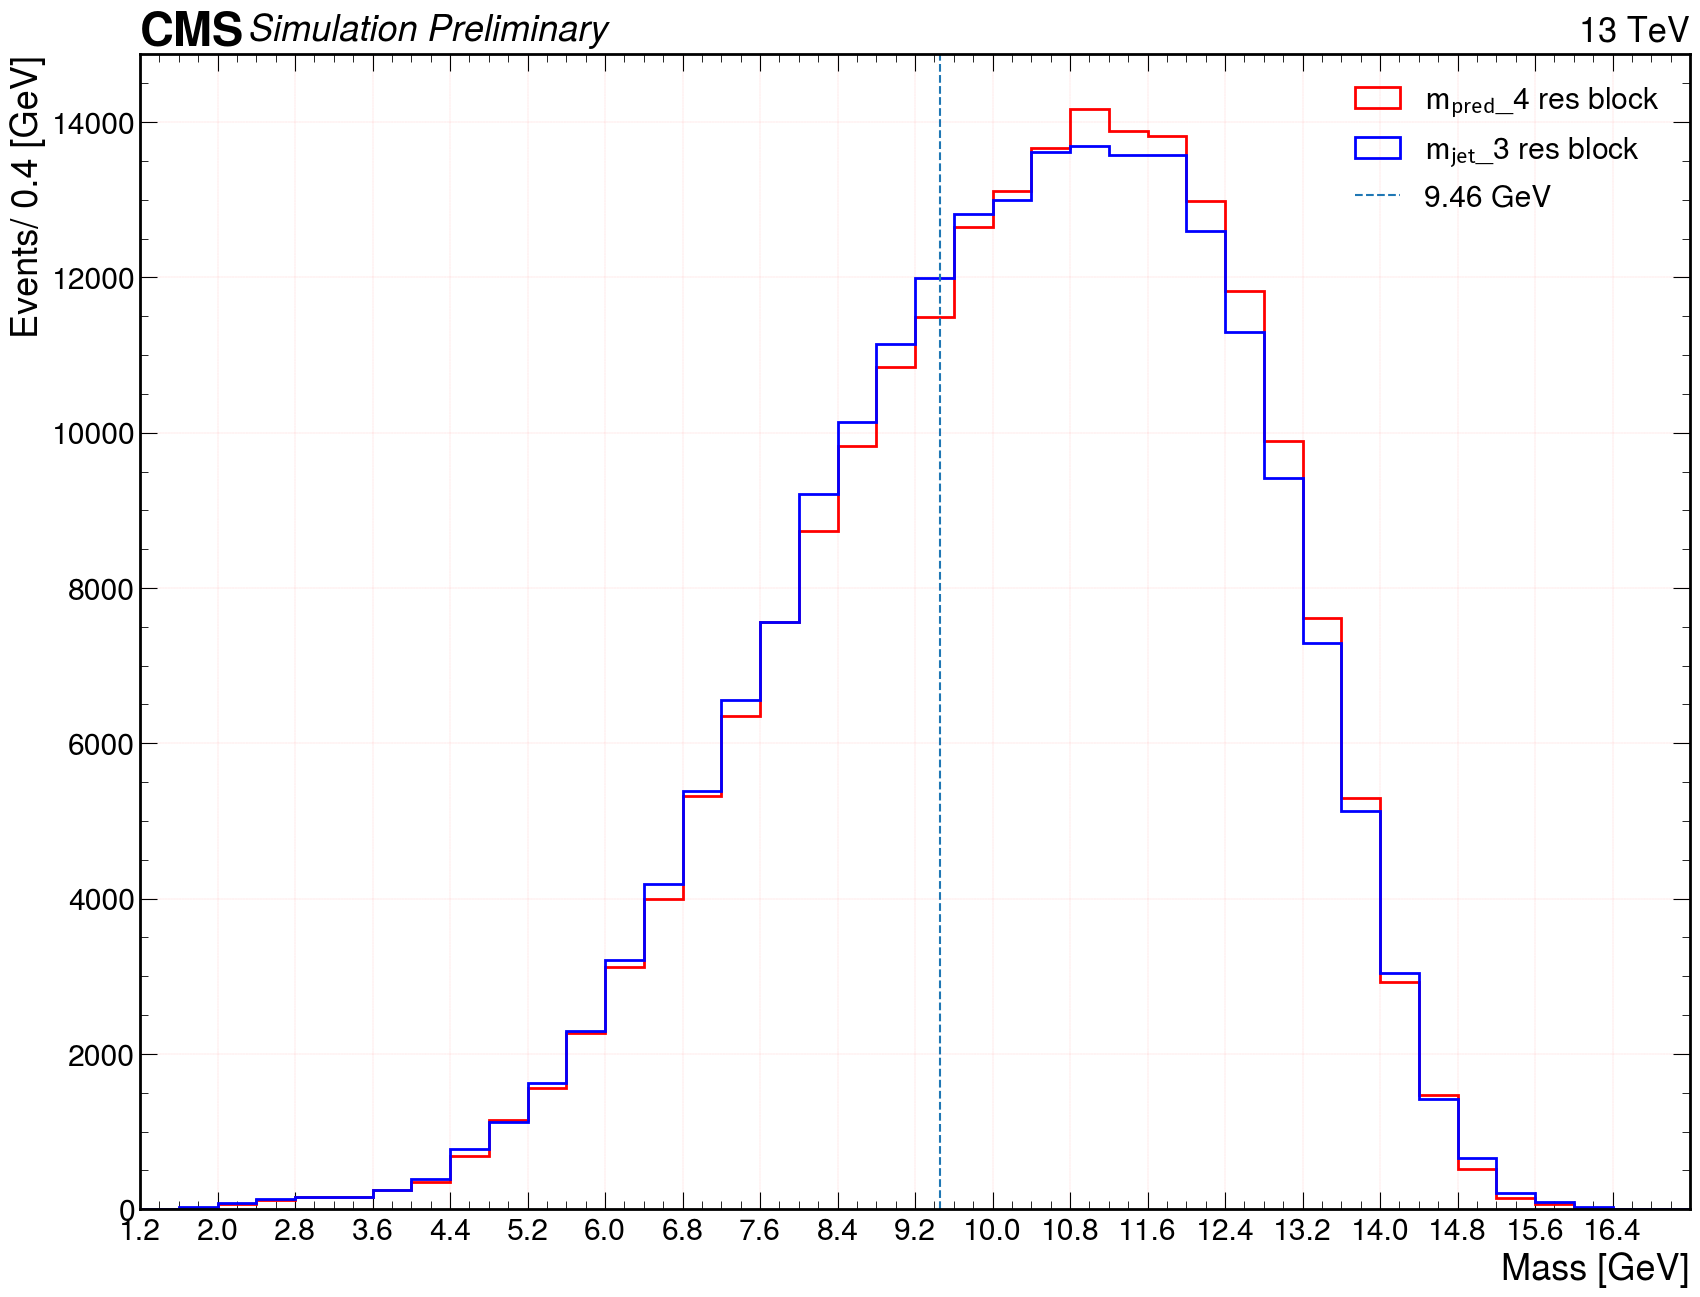

In [6]:
bin_width = 0.4
data_file1 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_*/INFERENCE_DATA/*U*/*")[0]
infile1 = open(f"{data_file1}", "rb")
data1 = pickle.load(infile1)
print(f"loaded data file 1 ------>  {data_file1}")
infile1.close()
m_true_u1 = data1["m_true"]
m_pred_u1 = data1["m_pred"]
jet_massu1 = data1["m0"]

data_file2 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*U*/*")[0]
infile2 = open(f"{data_file2}", "rb")
data2 = pickle.load(infile2)
print(f"loaded data file 2 ------>  {data_file2}")
infile2.close()
m_pred_u2 = data2["m_pred"]

# # Check 1D m_pred
# # Extebded version
fig, ax = plt.subplots(figsize=(20,15))
plt.hist(m_pred_u1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%'4 res block', linestyle='-', color='red', linewidth=2)

plt.hist(m_pred_u2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'3 res block', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_u3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'4_ch', linestyle='-', color='green', linewidth=2)
# plt.hist(jet_massu1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{inv}}$', linestyle='--', color='black', linewidth=2)

plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [9]:
def plot_diffresblock_model_for_massreg(mass='3p7'):   
    data_file1 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_*/INFERENCE_DATA/*M_{mass}*/*")[0]
    mass_ = {'3p7': 3.7, '4': 4, '5': 5,'6':6, '8':8, '10':10, '12':12, '14':14}.get(mass, None)
    infile1 = open(f"{data_file1}", "rb")
    data1 = pickle.load(infile1)
    print(f"loaded data file 1 ------>  {data_file1}")
    infile1.close()
    m_true_u1 = data1["m_true"]
    m_pred_u1 = data1["m_pred"]
    jet_massu1 = data1["m0"]

    data_file2 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    infile2 = open(f"{data_file2}", "rb")
    data2 = pickle.load(infile2)
    print(f"loaded data file 2 ------>  {data_file2}")
    infile2.close()
    m_pred_u2 = data2["m_pred"]
    
    # data_file3 = glob.glob(f"../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    # infile3 = open(f"{data_file3}", "rb")
    # data3 = pickle.load(infile3)
    # print(f"loaded data file 3 ------>  {data_file3}")
    # infile3.close()
    # m_pred_u3 = data3["m_pred"]


    # Check 1D m_pred
    # Extebded version
    fig, ax = plt.subplots(figsize=(20,15))
    plt.hist(m_pred_u1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%'4 res block', linestyle='-', color='red', linewidth=2)

    plt.hist(m_pred_u2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'3 res block', linestyle='-', color='blue', linewidth=2)
    # plt.hist(m_pred_u3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'4_ch', linestyle='-', color='green', linewidth=2)
    # plt.hist(jet_massu1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{inv}}$', linestyle='--', color='black', linewidth=2)

    plt.axvline(x= mass_,linestyle='--',label=f'{mass_} GeV')
    plt.xlim(m0_min-1.2,m0_max+1.2)
    plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8))
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()


loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_reblock4/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch28_val_pseudoscalar_mae2.9460_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.8918_inference_data.pkl


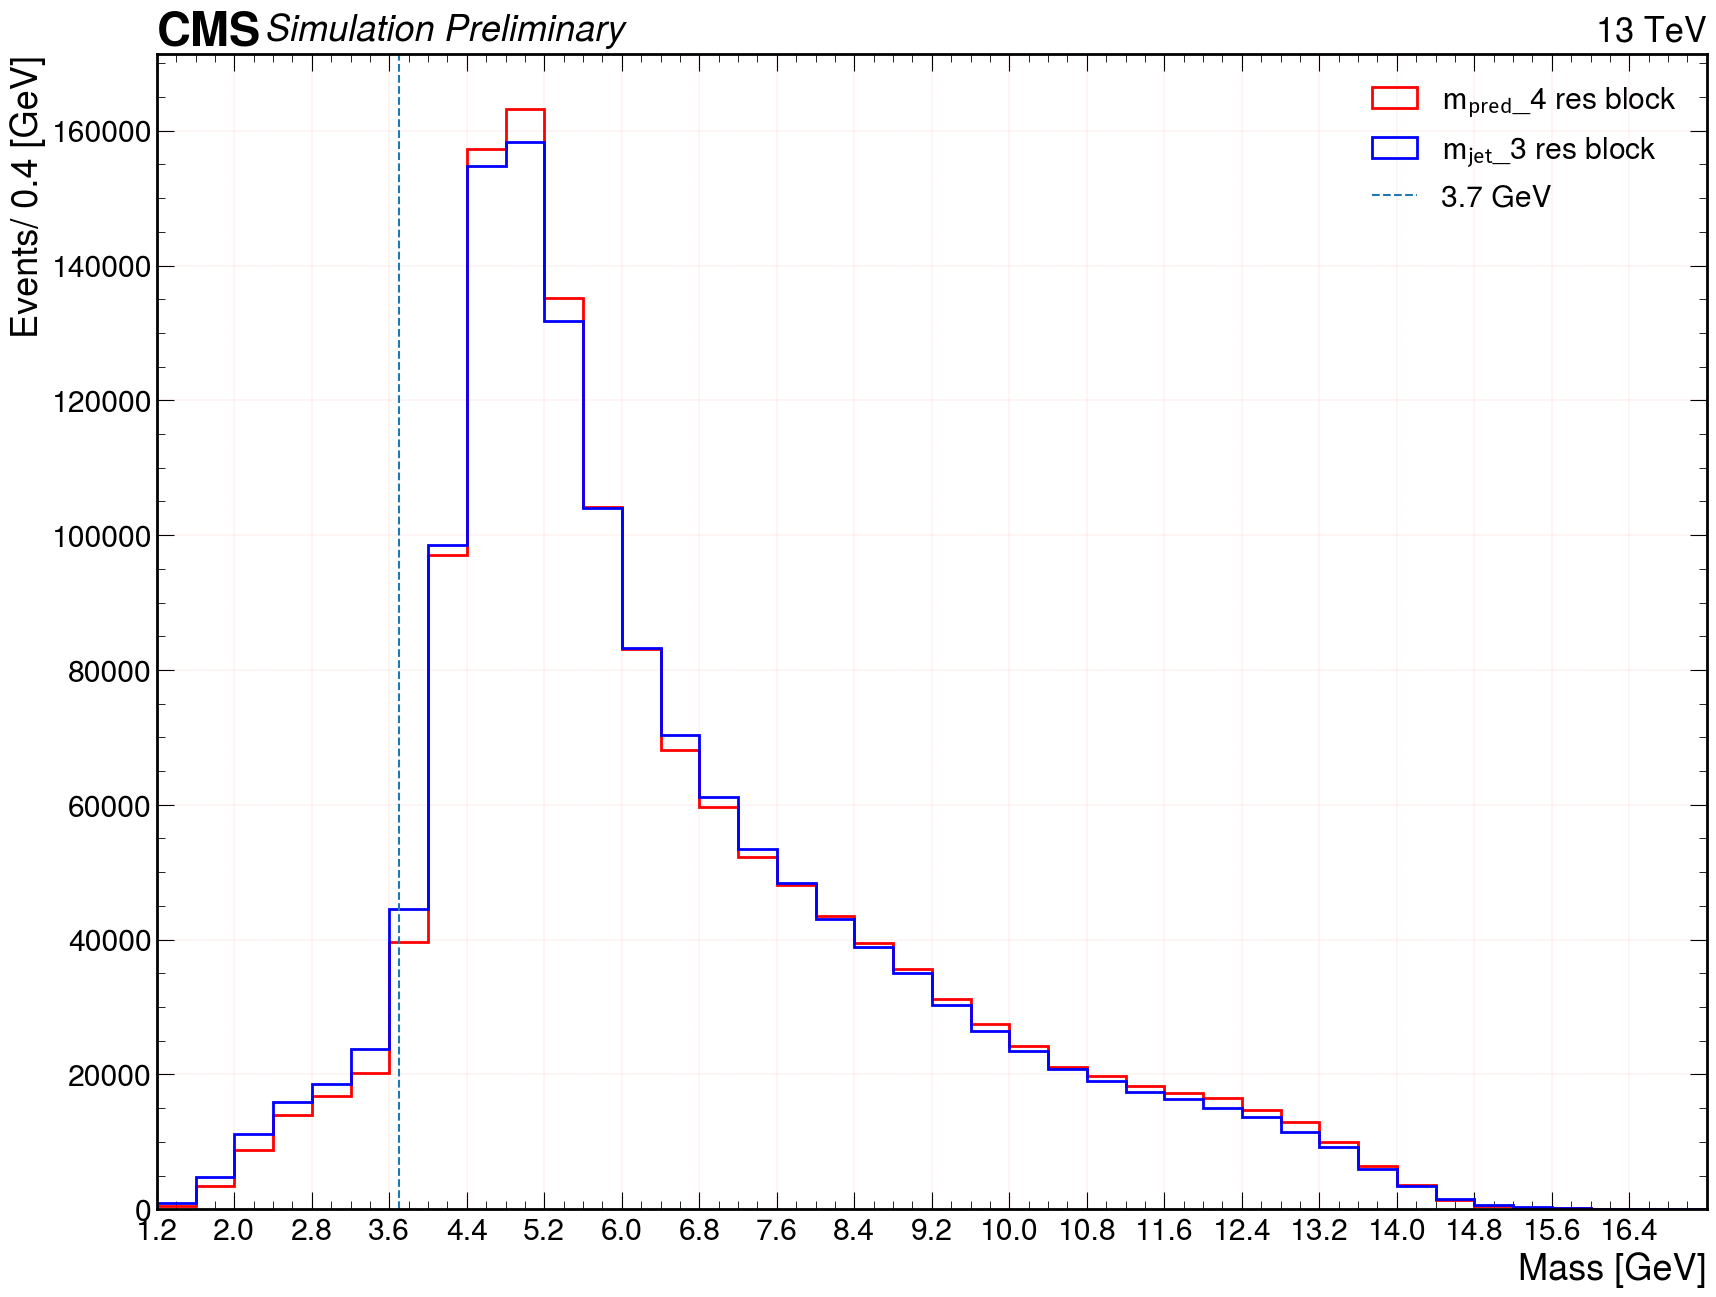

In [10]:
plot_diffresblock_model_for_massreg(mass='3p7')

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_reblock4/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch28_val_pseudoscalar_mae1.7370_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7940_inference_data.pkl


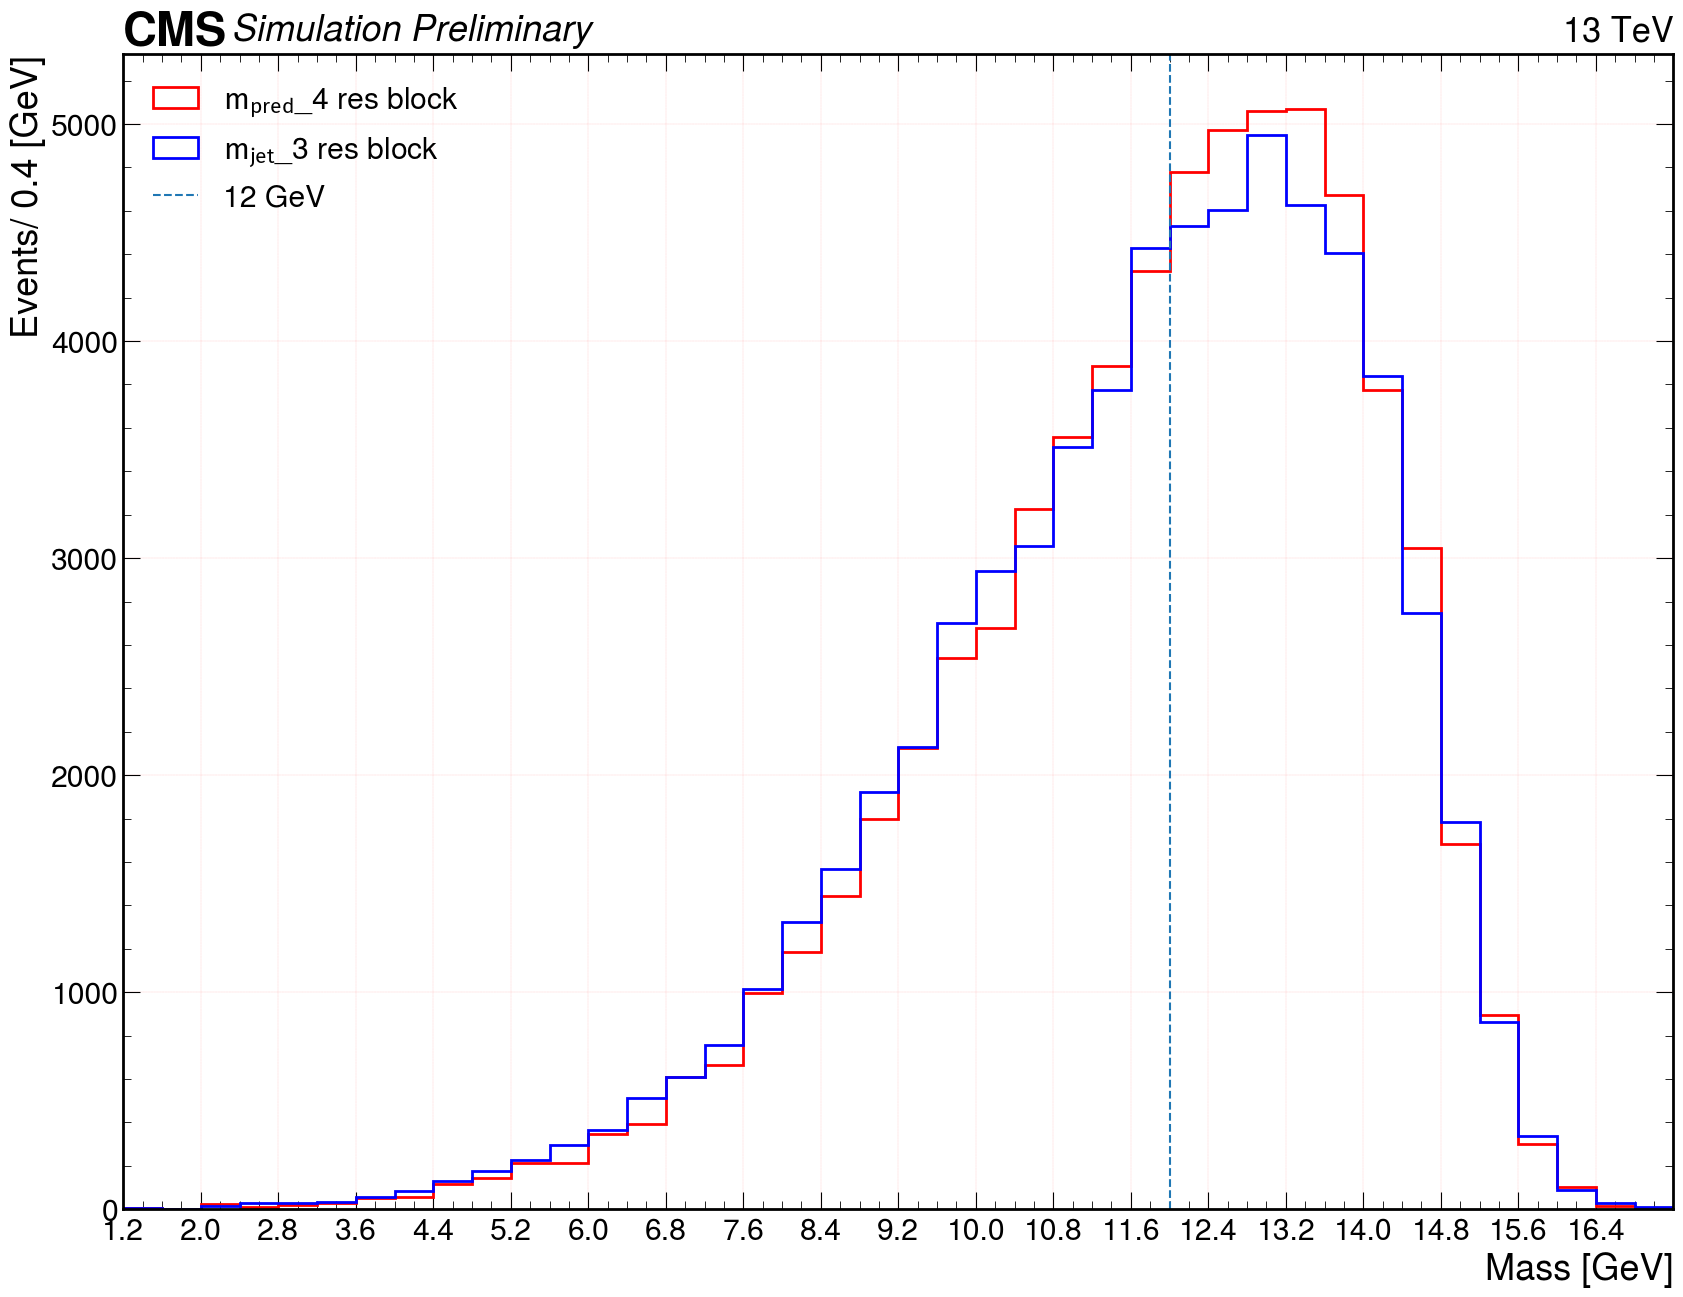

In [11]:
plot_diffresblock_model_for_massreg(mass='12')

loaded data file 1 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_reblock4/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch28_val_pseudoscalar_mae1.9320_inference_data.pkl
loaded data file 2 ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9324_inference_data.pkl


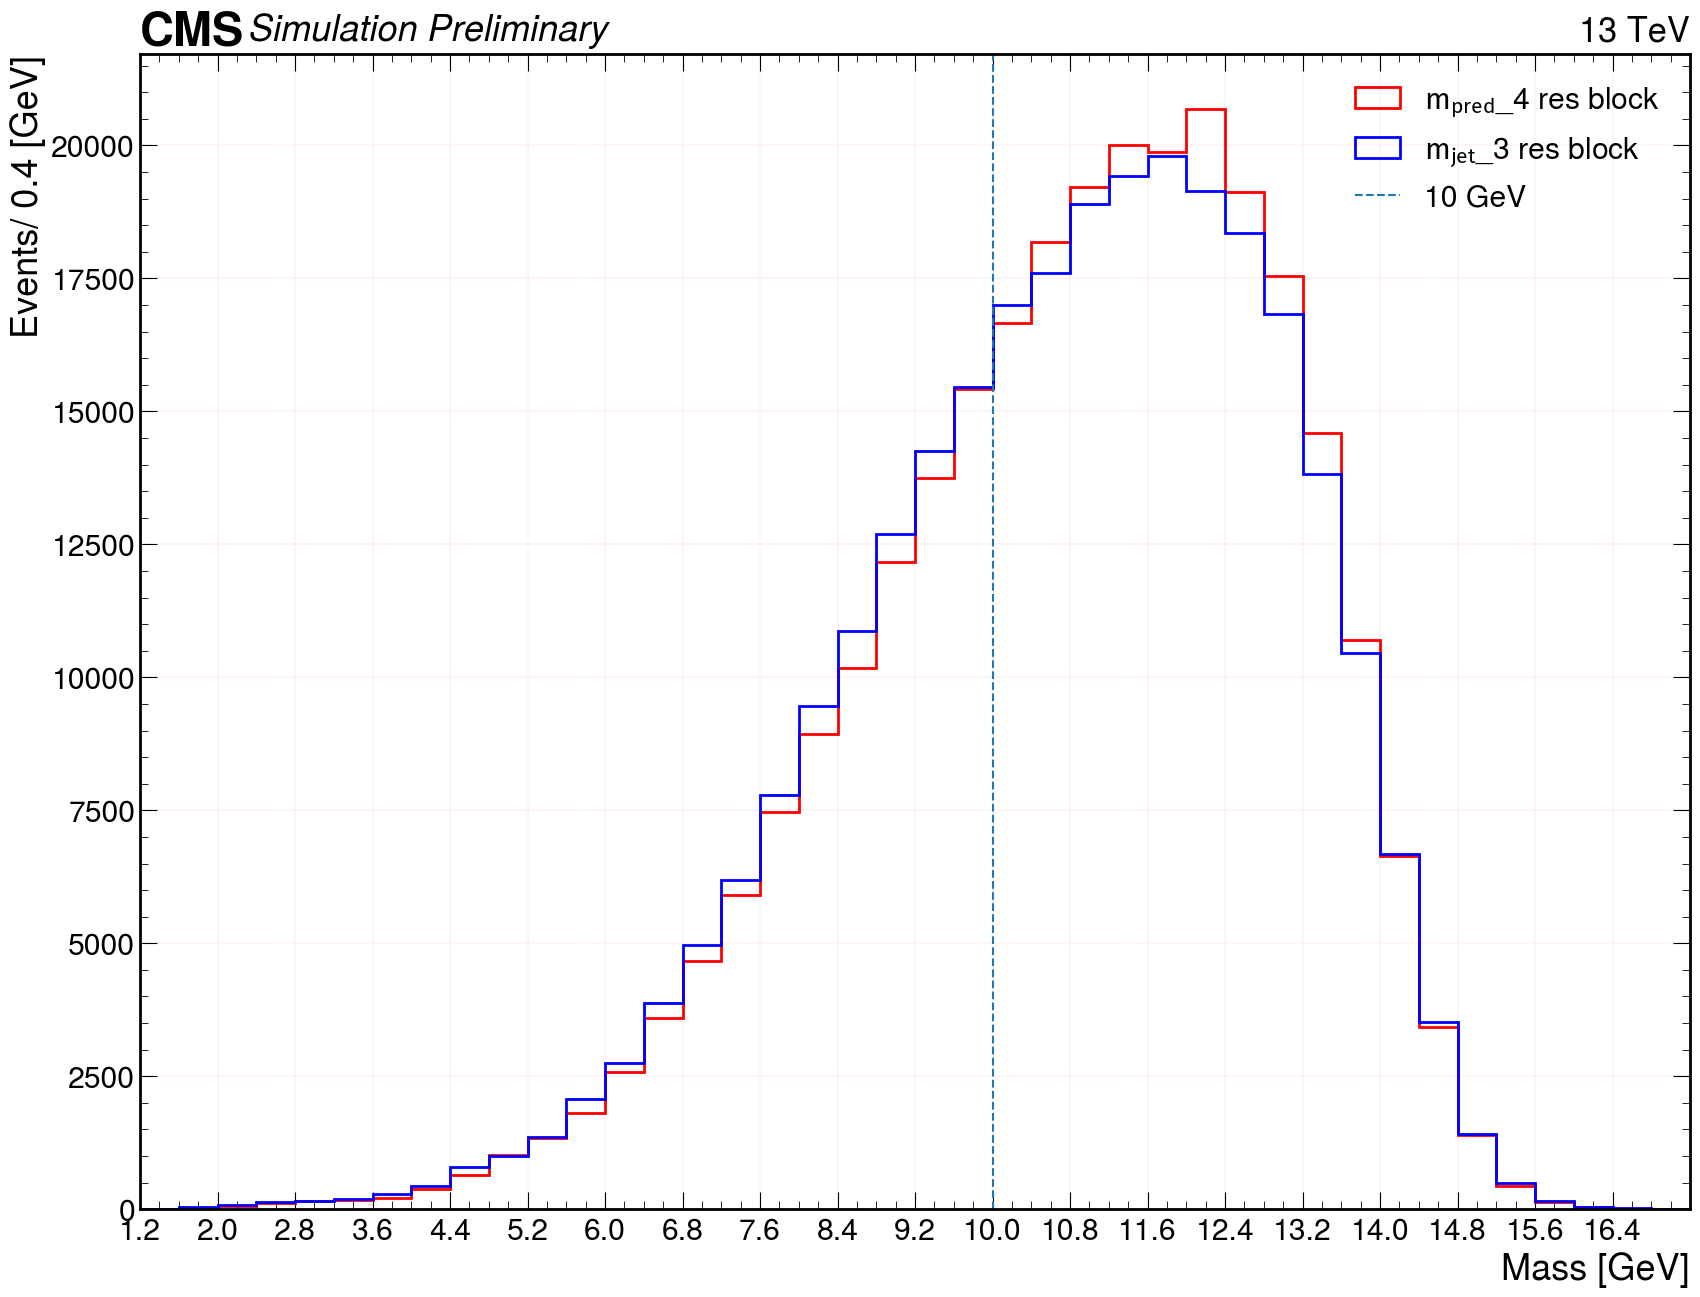

In [12]:
plot_diffresblock_model_for_massreg(mass='10')